<a href="https://colab.research.google.com/github/MahdiZaman/Spring2019-CAP5610/blob/master/hw1p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import numpy as np
# train_images_r = train_images_original.reshape((60000, 28 * 28))
train_images = np.round(train_images_original.astype('float32') / 255)

# test_images_r = test_images_original.reshape((10000, 28 * 28))
# test_images_n = test_images_r.astype('float32') / 255
test_images = np.round(test_images_original.astype('float32') / 255)
# print(train_images.shape)

ntrain = train_images.shape[0]
ntest = test_images.shape[0]

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
class Graph: 
  
    def __init__(self, row, col, g): 
            self.ROW = row 
            self.COL = col 
            self.graph = g 

    def isSafe(self, i, j, visited): 
        return (i >= 0 and i < self.ROW and 
                j >= 0 and j < self.COL and 
                not visited[i][j] and not self.graph[i][j]) 

    def DFS(self, i, j, visited): 
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

        visited[i][j] = True

        # Recur for all connected neighbours 
        for k in range(8): 
            if self.isSafe(i + rowNbr[k], j + colNbr[k], visited): 
                self.DFS(i + rowNbr[k], j + colNbr[k], visited) 

    def countIslands(self): 
        # Make a bool array to mark visited cells. 
        # Initially all cells are unvisited 
        visited = [[False for j in range(self.COL)]for i in range(self.ROW)] 

        
        count = 0
        for i in range(self.ROW): 
            for j in range(self.COL): 
                # If a cell with value 1 is not visited yet,  
                # then new island found 
                if visited[i][j] == False and self.graph[i][j] == 0:  
                    # Visit all cells in this island  
                    # and increment island count 
                    self.DFS(i, j, visited) 
                    count += 1

        return count 

In [0]:
traindfs = np.zeros((ntrain,1))
for i in range(ntrain):
    t = Graph(28,28,train_images[i]).countIslands()
    traindfs[i][0] = t
    
testdfs = np.zeros((ntest,1))
for i in range(ntest):
    t = Graph(28,28,test_images[i]).countIslands()
    testdfs[i][0] = t
    
traindfsn = traindfs.astype('float32') / np.max(traindfs)
testdfsn = testdfs.astype('float32') / np.max(testdfs)

In [0]:
train_images_r = train_images_original.reshape((60000, 28 * 28))
train_images_r = train_images_r.astype('float32') / 255 
test_images_r = test_images_original.reshape((10000, 28 * 28))
test_images_r = test_images_r.astype('float32') / 255 

train_images_f = np.c_[train_images_r, traindfsn]
test_images_f = np.c_[test_images_r, testdfsn]

In [64]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28*28+1,)))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7860      
Total params: 7,860
Trainable params: 7,860
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [68]:
epochs = 20
history = network.fit(train_images_f, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=64, 
                      validation_data=(test_images_f, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3956 - acc: 0.8932 - val_loss: 0.3710 - val_acc: 0.9025
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3880 - acc: 0.8952 - val_loss: 0.3644 - val_acc: 0.9034
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3813 - acc: 0.8964 - val_loss: 0.3584 - val_acc: 0.9050
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3754 - acc: 0.8980 - val_loss: 0.3533 - val_acc: 0.9065
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3701 - acc: 0.8991 - val_loss: 0.3486 - val_acc: 0.9073
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3654 - acc: 0.9003 - val_loss: 0.3445 - val_acc: 0.9079
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3611 - acc: 0.9012 - val_loss: 0.3407 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

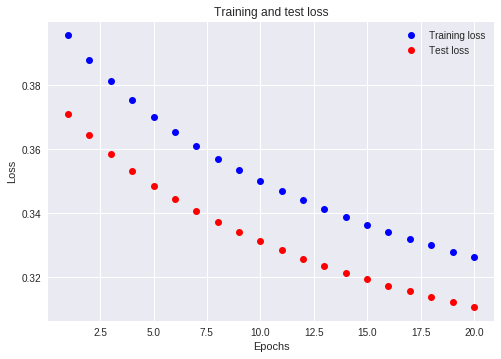

In [70]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

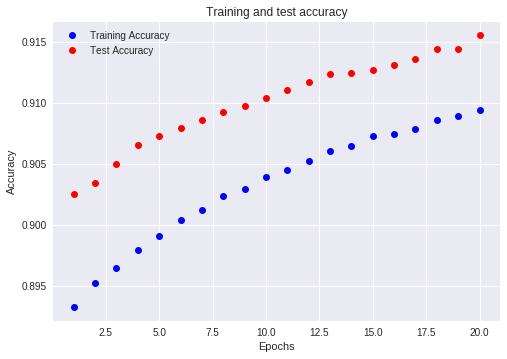

In [71]:
plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test Accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()